<a href="https://colab.research.google.com/github/Poojahoolageri8050/Air-BnB-Analysis-/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

1)First we start with importing all libraries which we need in future use.

In [ ]:
#Import package
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

2) Now we mount the drive and will import the dataset (Airbnb NYC 2009)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading csv File

file_path = '/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(file_path)

3) We have read the csv file and created a dataframe, now we will use .info() method to see all the variables (columns) along with informations such as non null values and datatype of the variable

In [ ]:
airbnb_df.info()

Lets now understand about every column in the dataframe.

'id' => It is the unique id given for listings./
'name' => It is a column which contains the desciptions/names provided by the /respective hosts for the reference of their customers./
'host_id' and 'host_name' => Many properties are being offered by many hosts. This 'host_id' and 'host_name' holds the records of all those hosts./
'neighbourhood' and 'neighbourhood_group' => These columns holds the information about the city and areas of the properties which are offered in airbnb New York./
'Longitude' and 'Latitude' => As the name suggests it just contains the longitude and latitude of the property location/
'Room_type' => It displays the room_type of the property ( either private room / entire home / shared room )
'price' => Its an important column which holds the price value of all those properties./
'minimum_nights' => It gives us information about the minimum number of nights that is offered by hosts for particular property./
'number_of_reviews' and 'reviews_month' => It contains information about the number of reviews and reviews per month for those properties and hosts hospitality./
'availabilty_365' => It gives information about the availability of the listings./



4) Trying to have look at the dataframe with the method .head()



In [ ]:
airbnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


5) We alredy saw that several columns have NaN values in it. Now focusing on to check how many null values are present in every column.

In [ ]:
airbnb_df.isna().sum()
# ( airbnb_df.isna().sum() ) / len(airbnb_df) *100
# the above line gives the % of null values in every column which is very helpfull when we want to deal with the null values.

id                                   0
name                                16
host_id                              1
host_name                           19
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       4830
reviews_per_month                 4830
calculated_host_listings_count       1
availability_365                     1
dtype: int64

In [ ]:
airbnb_df.shape

(29203, 16)

Here, column names 'name' and 'host_name' have very few null values when compared to the total records of the dataframe. But we have columns 'last_review' and 'reviews_per_month' with noticeable records which are missing.

We can ignore the 'name' and 'host_name' columns missing values as we have unique ids for name and host_name as well.

But we can't ignore the other columns. Here we drop the 'last_review' column as it is not of that much help to our analysis.

And we fill the NaN values in 'reviews_per_month' column with 0.

We now drop 'calculated_host_listings_count' as well, as it just gives the count of host_id.In further analysis, whenever is needed we can just calculate the count of those host_id instead of using this column. Just trying to keep fewer columns throughout the analysis which ever is most needed

Treating Null values

In [ ]:
airbnb_df['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
airbnb_df.drop(['last_review','calculated_host_listings_count'],axis=1,inplace=True)

Now our dataframe is quite simple with few columns.

In [ ]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,355.0


In [ ]:
airbnb_df.isna().sum()

id                      0
name                   16
host_id                 1
host_name              19
neighbourhood_group     1
neighbourhood           1
latitude                1
longitude               1
room_type               1
price                   1
minimum_nights          1
number_of_reviews       1
reviews_per_month       0
availability_365        1
dtype: int64

Now we will look at the data summary. Still we did not remove outliers but NaN are treated

In [ ]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')

Treating Outliers

In [ ]:
airbnb_df.price.describe()

count    29202.000000
mean       148.219095
std        226.261213
min          0.000000
25%         70.000000
50%        109.000000
75%        174.000000
max      10000.000000
Name: price, dtype: float64

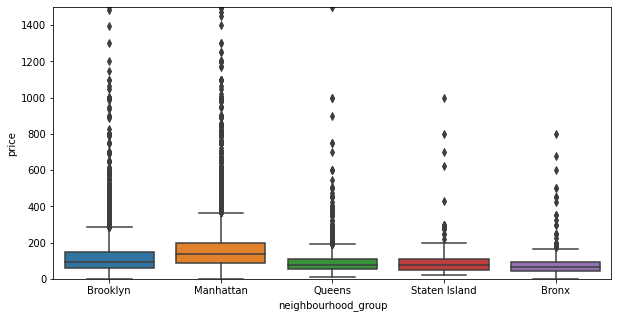

In [ ]:
plt.figure(figsize=(10,5))
plt.ylim(0,1500)
sns.boxplot(x='neighbourhood_group', y='price',data=airbnb_df)
plt.show()

In [ ]:
len(airbnb_df[airbnb_df['price']>500])

533

In [ ]:
airbnb_df['price'][airbnb_df['price']>600] = 600

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


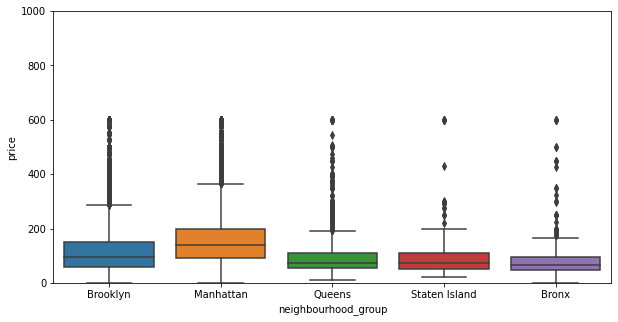

In [ ]:
plt.figure(figsize=(10,5))
plt.ylim(0,1000)
sns.boxplot(x='neighbourhood_group', y='price',data=airbnb_df)
plt.show()

6)Now we even treated outliers(just minimized) and treated NaN, we will start with analysing what observations can be drawn from the dataframe in here.

Exploratory Data Analysis (EDA)
1) Rentals/properties present in Neighbourhood group , Neighbourhood, Room type
a) No. of rentals/properties which are grouped by room_type in each neighbourhood

In [ ]:
airbnb_df.groupby(['neighbourhood_group'],dropna=True)['room_type'].value_counts()


neighbourhood_group  room_type      
Bronx                Private room        309
                     Entire home/apt     175
                     Shared room          17
Brooklyn             Entire home/apt    6289
                     Private room       6177
                     Shared room         176
Manhattan            Entire home/apt    7943
                     Private room       4884
                     Shared room         242
Queens               Private room       1648
                     Entire home/apt    1096
                     Shared room          68
Staten Island        Private room         95
                     Entire home/apt      83
Name: room_type, dtype: int64

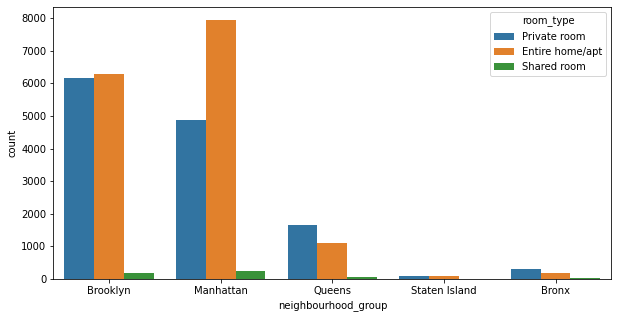

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='neighbourhood_group', hue='room_type', data=airbnb_df)
plt.show()

Throughout NY, we have our properties located in 5 neighbourhood group. Clearly we can see that the cities Manhattan and Brooklyn are the cities with most number of properties. We can even obseve the room_type in here.

There are 3 categories available in room_type. And we can even observe the number of properties in each room_type in those 5 cities. We can get the conclusion,

(1)more number of properties of home are avialbale in Manhattan when compared to all cities

(2)the private room properties are varying from cities to cities. Count of private roomtypes are all high/almost equal to the number of home properties except Manhattan

(3)shared room properties are very few in all cities

b)Total number of rentals/properties in each neighbourhood group


In [ ]:
n = airbnb_df.neighbourhood_group.unique()
nbd_grp = list(n)

In [ ]:
def plot_nbd():
  plt.figure(figsize=(10,5))
  nbd_cnts=[]
  for i in nbd_grp:
    nbd_cnts.append(airbnb_df['id'][airbnb_df['neighbourhood_group']==i].value_counts().sum())
    
  plt.plot(nbd_grp,nbd_cnts)

  plt.legend(nbd_grp)
  print(nbd_cnts)

[12642, 13069, 2812, 178, 501, 0]


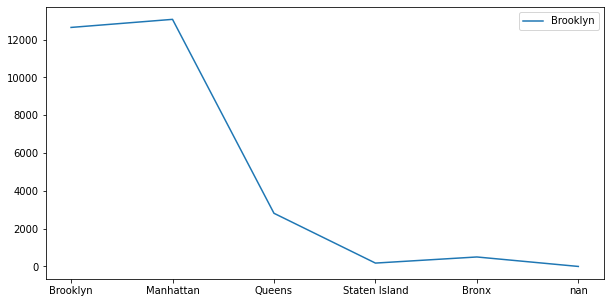

In [ ]:
plot_nbd()


This gives information about the count of properties present in those 5 cities. We can observe that Brooklyn and Manhattan has more properties when compared to all 5 cities. In particular, Manhattan is the city which is busy city with most properties to offer.

c)Total count of room types available in NYC

In [ ]:
airbnb_df['room_type'].value_counts()


Entire home/apt    15586
Private room       13113
Shared room          503
Name: room_type, dtype: int64

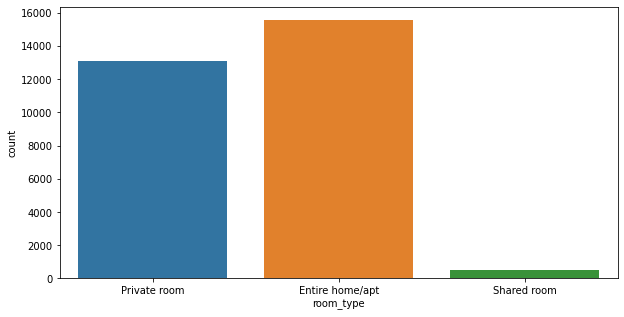

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='room_type', data= airbnb_df)
plt.show()

Overall just trying to fetch more information about the room_types in general, we have more properties in home/apt. We already know that home/apt is most demanded room_type throughout NY.

d) Overall contributions of each neighbourhood in the count of listings throughout NYC


([<matplotlib.patches.Wedge at 0x7ff1876c6590>,
 [Text(-0.18047654088642467, -1.0850936448941495, 'Manhattan'),
  Text(0.5659094250556649, 0.9432637609031563, 'Brooklyn'),
  Text(-0.9911538032479086, 0.47708923516173196, 'Queens'),
  Text(-1.0953281345848973, 0.10127328170237908, 'Bronx'),
  Text(-1.0997983214542344, 0.021063051214126247, 'Staten Island')],
 [Text(-0.09844174957441344, -0.5918692608513543, '44.8%'),
  Text(0.30867786821218085, 0.5145075059471761, '43.3%'),
  Text(-0.5406293472261319, 0.26023049190639924, '9.6%'),
  Text(-0.5974517097735802, 0.05523997183766131, '1.7%'),
  Text(-0.5998899935204914, 0.011488937025887042, '0.6%')])

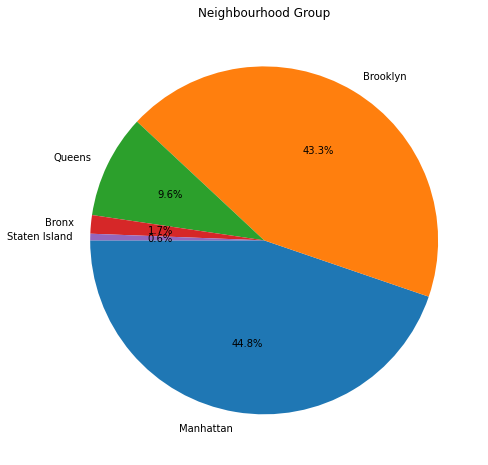

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Neighbourhood Group")
plt.pie(airbnb_df.neighbourhood_group.value_counts(), labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)




The more number of listings are observed in Manhattan as it takes the 44.3% of the overall listings.



d)Availability_365 and the neighbourhood_group


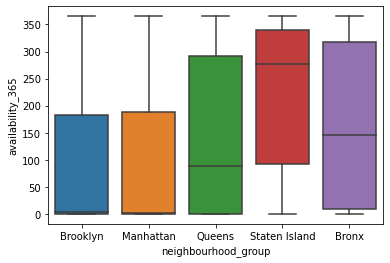

In [ ]:

sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365')


We can observe that the mean of listings count in Brooklyn, Manhattan and Queens are available only for 0 to 100 days a year.



2)Average price for each neighbourhood group






We got to know that most properties are available in Manhattan. Now we even want to know the average price of all the properties for the cities.



In [ ]:
avg_price_nbd= airbnb_df.groupby(['neighbourhood_group','room_type'],dropna=True)['price'].mean().reset_index()
avg_price_nbd

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,121.308571
1,Bronx,Private room,63.485437
2,Bronx,Shared room,101.117647
3,Brooklyn,Entire home/apt,164.951821
4,Brooklyn,Private room,74.253035
5,Brooklyn,Shared room,57.409091
6,Manhattan,Entire home/apt,209.768853
7,Manhattan,Private room,103.476658
8,Manhattan,Shared room,90.314050
9,Queens,Entire home/apt,134.749088


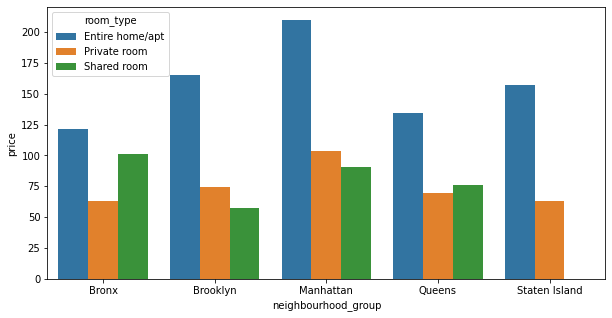

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='neighbourhood_group',y='price', hue='room_type', data=avg_price_nbd)
plt.show()

We can observe that, Manhattan is the city which is in lead in all aspects. Its price for all room_type properties are pretty high when compared to the rest of the cities. Indeed its busy and famous city.

In [ ]:
airbnb_df.groupby(['neighbourhood_group'])['price'].mean().reset_index()

,neighbourhood_group,price
0,Bronx,84.960080
1,Brooklyn,119.138348
2,Manhattan,167.834570
3,Queens,94.978307
4,Staten Island,107.028090


In [ ]:
def nbd_avg_price(df,x_axis,y_axis):
  group_price = df.groupby([x_axis],as_index=False)[y_axis].mean().reset_index(drop=True)
  plt.figure(figsize=(10,5))
  sns.barplot(x=group_price[x_axis],y=group_price[y_axis])
  plt.ylabel('mean ' + y_axis)
  plt.show()

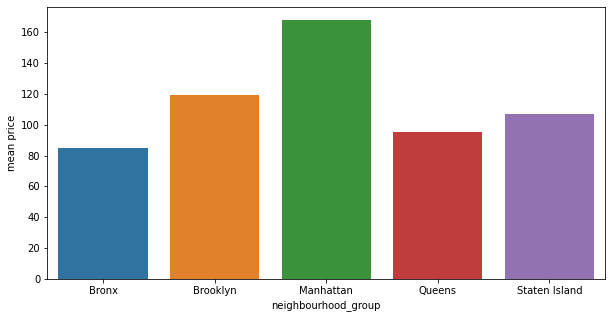

In [ ]:
nbd_avg_price(airbnb_df,'neighbourhood_group','price')


We already saw that Manhattan is the city which has high price for all the room_type properties. Now in here,we just tried to fetch a visualization of price with neighbourhood_group alone.



3)Average Price for each neighbourhood areas in respective neighbourhood_groups

Trying to obsere the trend of price for each areas/neighbourhood in those cities.



In [ ]:
  for i in nbd_grp:
  nbd_price= airbnb_df[airbnb_df['neighbourhood_group']==i].groupby(['neighbourhood'])['price'].mean().reset_index(drop=False)
  nbd_price = pd.DataFrame(nbd_price)
  plt.figure(figsize=(10,5))
  plt.xticks(rotation=90)
  plt.title(i)
  plt.plot(nbd_price['neighbourhood'],nbd_price['price'])


We can observe that many cities are having very fluctuating price in their neighbourhood.Especially Manhattan is the city which has even very less price and even very high price in its neighbourhood

4) Price distribution data in every neighbourhood_group


We already saw the price variation for the neighbourhood of each neighbourhood group.Now we trying to see some price distribution for each neighbour_group alone or i can say for the 5 cities.

In [ ]:
for i in nbd_grp:
  df_price=pd.DataFrame(airbnb_df['price'][airbnb_df['neighbourhood_group']==i])
  print(i)
  print(df_price.describe(),"\n")

5)Overall Price distribution throught NY



Till now we discussed the price range only for neighbouhood / neighbourhood_group / room_type. Now lets focus on how well the price is varying throughout NY.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


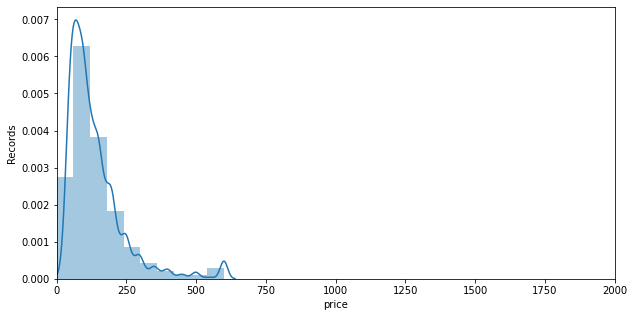

In [ ]:

plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('Price')
plt.ylabel('Records')
sns.distplot(airbnb_df['price'],bins=10,kde=True)
plt.show()
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.


We can observe that most of the price are in between the range 0 to 250.( We can say those properties are not that high until you want to opt for a fancy property with high price.)

6)In search of a famous Host
Here I tried searching the famous host, i felt that whoever has the most number of properties(doesn't matter if its a private room/home/shared room) is the famous host. He has been offering those properties for the customers. And if the property count is more that means he has more to offer. So obviously he is the one famous host.



In [ ]:
famous_host = airbnb_df['host_id'].value_counts().head(20)
famous_host = pd.DataFrame(famous_host)
famous_host.reset_index(inplace=True)
famous_host.rename(columns={'index':'Host_id','host_id':'Count'},inplace=True)
famous_host.head(2)

,Host_id,Count
0,30283594.0,113
1,22541573.0,81


[Text(0, 0, '417504.0'),
 Text(0, 0, '1475015.0'),
 Text(0, 0, '2119276.0'),
 Text(0, 0, '2856748.0'),
 Text(0, 0, '3191545.0'),
 Text(0, 0, '7245581.0'),
 Text(0, 0, '7503643.0'),
 Text(0, 0, '13347167.0'),
 Text(0, 0, '16098958.0'),
 Text(0, 0, '16437254.0'),
 Text(0, 0, '22541573.0'),
 Text(0, 0, '25237492.0'),
 Text(0, 0, '26377263.0'),
 Text(0, 0, '30283594.0'),
 Text(0, 0, '50760546.0'),
 Text(0, 0, '51501835.0'),
 Text(0, 0, '61391963.0'),
 Text(0, 0, '76104209.0'),
 Text(0, 0, '120762452.0'),
 Text(0, 0, '134184451.0')]

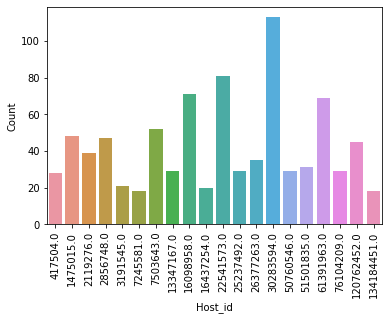

In [ ]:
plt1 = sns.barplot(x='Host_id',y='Count',data=famous_host)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

Above is the visualization which describes top 10 hosts whoever has the most number of properties to offer.

In [ ]:
top_host_id = famous_host['Host_id'][famous_host['Count']==famous_host['Count'].max()]
top_host_name = airbnb_df[['host_name','neighbourhood_group']][airbnb_df['host_id']==top_host_id[0]].head(1)
top_host_name

,host_name,neighbourhood_group
9740,Kara,Manhattan


We can see that the top1 host who is famous(according to me) is Sonder. And he is from Manhattan. Lets dig in deep for a bit.

In [ ]:
airbnb_df[['neighbourhood_group','neighbourhood','room_type','price','availability_365']][airbnb_df['host_id']==top_host_id[0]]

,neighbourhood_group,neighbourhood,room_type,price,availability_365
9740,Manhattan,Financial District,Entire home/apt,169.0,364.0
10075,Manhattan,Theater District,Entire home/apt,135.0,174.0
10335,Manhattan,Theater District,Entire home/apt,369.0,364.0
10398,Manhattan,Midtown,Entire home/apt,335.0,201.0
10490,Manhattan,Chelsea,Entire home/apt,129.0,161.0
...,...,...,...,...,...
19737,Manhattan,Hell's Kitchen,Entire home/apt,369.0,345.0
22138,Manhattan,Upper East Side,Entire home/apt,115.0,336.0
22376,Manhattan,Hell's Kitchen,Entire home/apt,499.0,185.0
22794,Manhattan,Midtown,Entire home/apt,199.0,189.0


Sonder, who we concluded that as famous host, has all the properties in Manhattan.

(1)He is offering many properties with almost all as 'Entire_home'.

(2)He has many properties in Financial Distict which may be more famous or i can say affordable to all. Because we can see the price as well, its reasonable one(not high/not low).

(3)We can even check that all the properties are available for almost 300+days.

So we can conclude that he is the famous one because he possesses the best properties(home properties) in best place(Manhattan).



7)Number_of_reviews



We tried analysing the data with respect to neighbourhood_group, neighbourhood, room_type, host_id and price. Now we will try to analyse Number of reviews and we will see what intrepretation we can get from here.

In [ ]:
top_reviewed_place=airbnb_df.nlargest(10,'number_of_reviews')
top_reviewed_place.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
11759,9145202,Room near JFK Queen Bed,47621202.0,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47.0,1.0,629.0,14.58,333.0
2031,903972,Great Bedroom in Manhattan,4734398.0,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49.0,1.0,607.0,7.75,293.0
2030,903947,Beautiful Bedroom in Manhattan,4734398.0,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49.0,1.0,597.0,7.72,342.0


1)Average price for the most_reviewed place:

In [ ]:
price_avrg=top_reviewed_place.price.mean()
print('Average price per night: {}'.format(price_avrg))


Average price per night: 65.4


2)with respect to hos

In [ ]:
nor_host = airbnb_df.groupby(['host_id','host_name'])['number_of_reviews'].max().reset_index()
nor_host = nor_host.sort_values(['number_of_reviews'],ascending=False).head(10)
nor_host

,host_id,host_name,number_of_reviews
18175,47621202.0,Dona,629.0
5962,4734398.0,Jj,607.0
16566,37312959.0,Maya,543.0
3581,2369681.0,Carol,540.0
14595,26432133.0,Danielle,510.0
10434,12949460.0,Asa,488.0
1544,792159.0,Wanda,480.0
3938,2680820.0,Linda,474.0
122,42273.0,Dani,467.0
13759,23591164.0,Angela,466.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Dona'),
 Text(0, 0, 'Jj'),
 Text(0, 0, 'Maya'),
 Text(0, 0, 'Carol'),
 Text(0, 0, 'Danielle'),
 Text(0, 0, 'Asa'),
 Text(0, 0, 'Wanda'),
 Text(0, 0, 'Linda'),
 Text(0, 0, 'Dani'),
 Text(0, 0, 'Angela')]

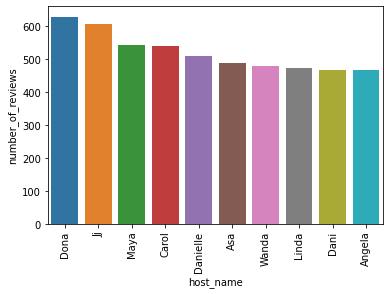

In [ ]:

plt2 = sns.barplot(nor_host['host_name'],nor_host['number_of_reviews'])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=90)

We found the top 10 hosts whose place got the most number of reviews.






3)Number of reviews for each neighbourhood_group

In [ ]:
nor_nbd_grp = airbnb_df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].max().reset_index()
nor_nbd_grp

,neighbourhood_group,room_type,number_of_reviews
0,Bronx,Entire home/apt,271.0
1,Bronx,Private room,321.0
2,Bronx,Shared room,116.0
3,Brooklyn,Entire home/apt,488.0
4,Brooklyn,Private room,480.0
5,Brooklyn,Shared room,236.0
6,Manhattan,Entire home/apt,447.0
7,Manhattan,Private room,607.0
8,Manhattan,Shared room,229.0
9,Queens,Entire home/apt,441.0


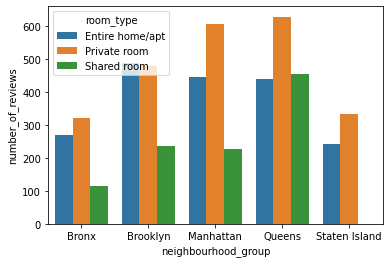

In [ ]:
sns.barplot(x=nor_nbd_grp['neighbourhood_group'],hue=nor_nbd_grp['room_type'],y=nor_nbd_grp['number_of_reviews'])

We can observe that Queens has the most_reviewed place in NY. Through this visualization we will get good comparision of the other neighbourhood as well.

Overall,

(1)So from the above result, we have the average price per night as 65.4.

(2)And we can observe that host_id 47621202 has most number of reviews for his property which is in Queens. We can even consider him as the famous host for some reason as he has most reviewed place in NY. Again its all upto our conception.

(3)the most reviewd place has very less price. That means we can conclude that the price which ever is very low, people tend to go to that home/private room. Hence it got most number of reviews.

(4)From observed data (above 4 result), we have the total number of properties in Queens is 5666 and out of which Now we can see that 629 reviews were on single property. Its pretty good. So we can come to the conclusion that Queens is the place/city which got most reviewd place. It may be because its comparibly cheap when it compared to other cities like Manhattan/Brooklyn.

(5) The top reviewed place was available for almost 333days out of 365 days of a year. Which gives us good picture that people tend to choose the property with less price and which is mostly available.

8)Average price for room_type throughout NY


Now we are focusing on the column room_type alone. We trying to find the average price for all room types throughout NY.

In [ ]:
#avg_price_room_type = airbnb_df.groupby(['room_type']).agg({'price': ['mean', 'min', 'max']})
avg_price_room_type = airbnb_df.groupby(['room_type'])['price'].mean().reset_index()
avg_price_room_type

,room_type,price
0,Entire home/apt,185.135891
1,Private room,84.184016
2,Shared room,77.214712


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


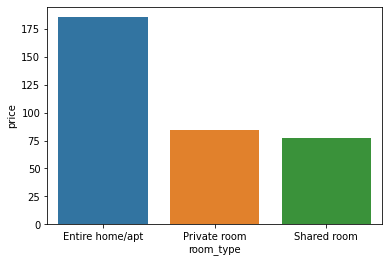

In [ ]:
sns.barplot(avg_price_room_type['room_type'],avg_price_room_type['price'])

We can see that Entire home/Apt is in demand and it has the price high when compared to private_room/shared_room.

9)Average price of the place which is most available

In [ ]:
most_available_place=airbnb_df.nlargest(10,'availability_365')
most_available_place.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,365.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0.00,365.0


In [ ]:
price_avrg=most_available_place.price.mean()
print('Average price of most avialble place: {}'.format(price_avrg))

We got to know that the average price for most available place is 150.3.We can see that its quite reasonable when compared to price range in total.

10)Average price in descending order based on minimum_nights of stay

In [ ]:
min_nights_stay = airbnb_df.groupby(['minimum_nights','neighbourhood_group','neighbourhood'],dropna=True)['price'].mean().reset_index()


In [ ]:
min_nights_stay.sort_values('minimum_nights',ascending=False,inplace=True)
min_nights_stay

,minimum_nights,neighbourhood_group,neighbourhood,price
1911,1250.0,Manhattan,Greenwich Village,180.0000
1910,1000.0,Manhattan,Battery Park City,400.0000
1909,999.0,Manhattan,Harlem,99.0000
1908,999.0,Brooklyn,Williamsburg,79.0000
1907,500.0,Queens,Long Island City,134.0000
...,...,...,...,...
120,1.0,Queens,Briarwood,93.3125
119,1.0,Queens,Bellerose,77.0000
118,1.0,Queens,Belle Harbor,225.0000
117,1.0,Queens,Bayswater,70.0000


Text(0, 0.5, 'Price')

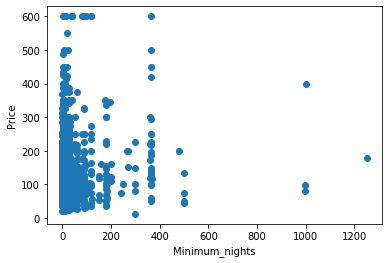

In [ ]:
plt.scatter(min_nights_stay['minimum_nights'],min_nights_stay['price'])
plt.xlabel('Minimum_nights')
plt.ylabel('Price')

We can clearly observe that we can't get much intrepetion from minimum_number_of_nights and price visualization. Even there are places with less price which has the minimum_nights as 1000 and vice versa. Because it mainly depends on the neighbourhood_group/city where you are staying.

11) Average price per night

In [ ]:
x = ['neighbourhood_group','room_type','minimum_nights','price']
prvsmin = airbnb_df[x]
prvsmin.head(5)

,neighbourhood_group,room_type,minimum_nights,price
0,Brooklyn,Private room,1.0,149.0
1,Manhattan,Entire home/apt,1.0,225.0
2,Manhattan,Private room,3.0,150.0
3,Brooklyn,Entire home/apt,1.0,89.0
4,Manhattan,Entire home/apt,10.0,80.0


In [ ]:
# creating a new column which gives price per a single night
prvsmin['price_per_night'] = prvsmin['price']/prvsmin['minimum_nights']
prvsmin.head(5

SyntaxError: ignored

(a) Average price per night for each neighbourhood along with room_type

In [ ]:
# finding the average price for each neighbourhood
avg_price_per_night_nbd = prvsmin.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
avg_price_per_night_nbd

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,121.308571
1,Bronx,Private room,63.485437
2,Bronx,Shared room,101.117647
3,Brooklyn,Entire home/apt,164.951821
4,Brooklyn,Private room,74.253035
5,Brooklyn,Shared room,57.409091
6,Manhattan,Entire home/apt,209.768853
7,Manhattan,Private room,103.476658
8,Manhattan,Shared room,90.314050
9,Queens,Entire home/apt,134.749088


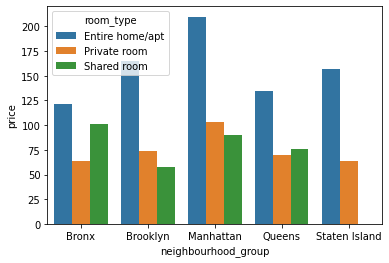

In [ ]:
sns.barplot(x=avg_price_per_night_nbd['neighbourhood_group'],hue=avg_price_per_night_nbd['room_type'],y=avg_price_per_night_nbd['price'])

Over all, we can see that in every neighbourhood group, Entire home/apartment has the price high. And Manhattan is the neighbourhood which average price is high in all room types.



(b) Average price per night for all 5 neighbourhood

In [ ]:
avg_price_per_night = prvsmin.groupby(['neighbourhood_group'])['price'].mean().reset_index()
avg_price_per_night

,neighbourhood_group,price
0,Bronx,84.960080
1,Brooklyn,119.138348
2,Manhattan,167.834570
3,Queens,94.978307
4,Staten Island,107.028090


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


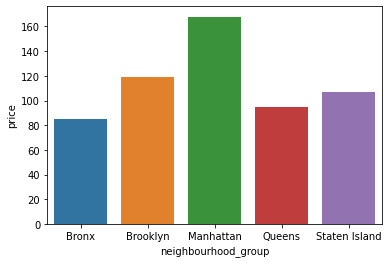

In [ ]:
sns.barplot(avg_price_per_night['neighbourhood_group'],avg_price_per_night['price'])

We can see that average price per night is high in Manhattan followed by Brooklyn.





(c) Average price per night for each room type throughout New York

In [ ]:
avg_price_per_night_nbd_room_type = prvsmin.groupby(['room_type'])['price'].mean().reset_index()
avg_price_per_night_nbd_room_type

,room_type,price
0,Entire home/apt,185.135891
1,Private room,84.184016
2,Shared room,77.214712


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


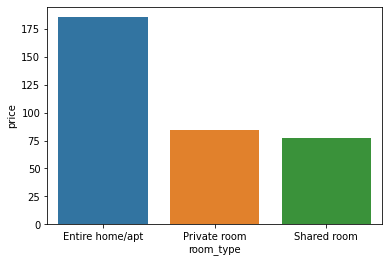

In [ ]:
sns.barplot(avg_price_per_night_nbd_room_type['room_type'],avg_price_per_night_nbd_room_type['price'])

We can observe that Entire home/Apartment price per night is high when compared to other room types



12)Longitude and Latitude



We considered all possible columns for visualization. Why not Longitude and Latitude ? Here we are just trying to do the visualization even more attractive with the fancy maps of geological graph.




(1)Map based on properties of Neighbourhood_group/cities

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


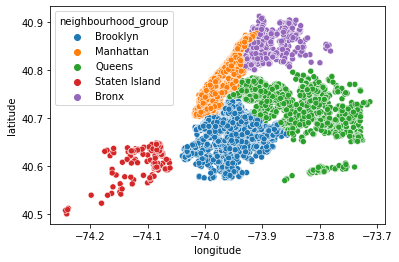

In [ ]:
#viasualizinf the newyork map from the goven data
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.neighbourhood_group)

In [ ]:
(2)Maps with respect to room_types available throughout NY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


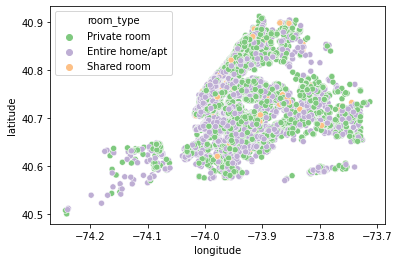

In [ ]:
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.room_type,palette='Accent')

(3)Maps which tells us about the price variation of all available properties

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


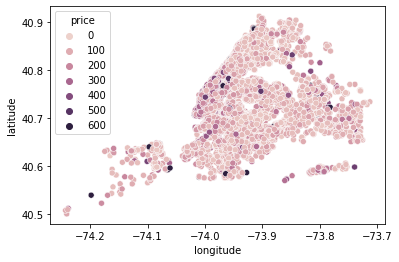

In [ ]:
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.price)

Conclusion:



(1) Price depends on Neighbourhood_group. Its high in Manhattan.


(2) Within neighbourhood_groups, price fluctuates between the range. But Manhattan is the place where we see alot ups and downs in price, giving the colclusion that Manhattan is the city which contains highest price and aswell as lowest price.


(3) We can get the famous host (Sonder from Manhattan) from the number of properties he is offering (OR) We can find the famous host(Jordan from Queens) with respect to most reviewed place as well.


(4) People reviewed at most in properties of Queens which has the lowest prices for their properties as well.


(5) Throughout NY, Entire home/apt is the room_type which is mostly in demand.


(6) Manhattan is the place which is famous and can be a good option for the companies to invest on properties of Entire home/Apt.